In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calplot
import numpy as np
from calendar import monthrange
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mc # For the legend
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num, DateFormatter, HourLocator, MinuteLocator
import os.path

import ap1

In [2]:
import importlib
importlib.reload(ap1)

<module 'ap1' from '/Users/kritkorns/Mike/Jacob/AdvancedProject1/01_Lab/ap1.py'>

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Load Data

In [4]:
path = '/Users/kritkorns/Mike/Jacob/AdvancedProject1/01_Lab'
years = range(2012, 2021)
#years = range(2018, 2019)
df_freqs = {}

for year in years:
    file = '{}/dataset/Germany/{}.csv'.format(path,year)
    df_temp = pd.read_csv(file, parse_dates=['Datetime'])
    #df_temp['Datetime'] = pd.to_datetime(df_temp['Datetime'])
    df_freqs[year] = df_temp



In [5]:
df_freqs_all = pd.concat(df_freqs)
df_freqs_all = df_freqs_all.set_index('Datetime')
df_freqs_all

,Frequency,year,month,day,hour,minute,second
Datetime,,,,,,,
2012-01-01 00:00:00,NaN,2012,1,1,0,0,0
2012-01-01 00:00:01,NaN,2012,1,1,0,0,1
2012-01-01 00:00:02,NaN,2012,1,1,0,0,2
2012-01-01 00:00:03,NaN,2012,1,1,0,0,3
2012-01-01 00:00:04,NaN,2012,1,1,0,0,4
...,...,...,...,...,...,...,...
2020-09-30 23:59:55,20.0,2020,9,30,23,59,55
2020-09-30 23:59:56,22.0,2020,9,30,23,59,56
2020-09-30 23:59:57,24.0,2020,9,30,23,59,57


## Month aggregation data in each year

In [6]:
years = range(2012, 2021)
for year in years:
    df_freqs[year] = df_freqs[year].set_index('Datetime')['Frequency']

## Analysis 

### Heatmap

In [6]:
dict_temp = []

file = path + '/result/germany_pivot.csv'
if not(os.path.exists(file)):
    for year in years:
        #df_temp = df_freqs_all[df_freqs_all['year']==year]
        df_temp = df_freqs[year]
        df_pivot = df_temp.pivot_table(index=['hour', 'minute', 'second'], columns=['year', 'month'], values='Frequency')
        dict_temp.append(df_pivot)
    df_pivot = pd.concat(dict_temp, axis=1)
    df_pivot.columns = ['{}.{}'.format(column[0], column[1]) for column in df_pivot.columns]
    df_pivot.to_csv(file)
else:
    print('The file {} is exist.'.format(file))
    df_pivot = pd.read_csv(file, 
                           index_col=['hour', 'minute', 'second'],
                           skipinitialspace=True)


The file /Users/kritkorns/Mike/Jacob/AdvancedProject1/01_Lab/result/germany_pivot.csv is exist.


In [7]:
display(df_pivot)

2012.2     2012.3     2012.4     2012.5    2012.6  \
hour minute second                                                         
0    0      0       18.207552   7.133290  15.618759  11.870323  4.492233   
            1       18.207552   7.054516  15.618759  11.795516  4.333533   
            2       18.089690   6.255129  14.924310  11.102452  4.223667   
            3       17.357345   5.463677  14.250793  10.503968  3.011000   
            4       16.511241   4.372903  13.358448  10.121968  2.742433   
...                       ...        ...        ...        ...       ...   
23   59     55      20.838448  11.169387  17.765586  14.201484  7.108533   
            56      19.706138  10.685129  17.517241  13.709355  6.132033   
            57      19.348345   9.964484  17.125897  13.666032  5.782100   
            58      19.179931   9.633677  16.511310  13.268258  5.513433   
            59      17.921414   8.495677  16.031379  12.236548  5.041467   

                      2012.7    2012.8     2012.9    2012.10    2012.11  \
hour minute second                                                        
0    0      0       3.790000  0.962710  15.100100  10.791387  20.137767   
            1       3.715194  0.962710  15.100100  10.791387  19.820400   
            2       3.148194  0.628032  13.688167   9.763613  18.925200   
            3       1.336806 -0.474452  13.244633   8.145258  18.026000   
            4       1.147774 -1.384032  12.740033   6.952129  16.223367   
...                      ...       ...        ...        ...        ...   
23   59     55      4.558000  6.708097  16.154000  12.122387  23.498800   
            56      4.506742  6.597677  15.429600  11.823097  23.128433   
            57      4.171968  6.298452  15.433667  11.697065  23.291300   
            58      4.093290  5.392806  14.388033  10.791387  22.318800   
            59      3.423839  4.447742  14.029967  10.381871  21.655533   

                      2012.12     2013.1     2013.2     2013.3     2013.4  \
hour minute second                                                          
0    0      0       11.775839  13.142323  12.686607  13.185581  20.869933   
            1       11.106516  12.539806  11.936786  13.028065  20.324633   
            2        9.027258  11.441161   9.887714  11.740387  18.648167   
            3        7.767226  10.031452   8.039179   9.314710  16.963567   
            4        6.369290   8.216097   7.202143   8.223935  15.360367   
...                       ...        ...        ...        ...        ...   
23   59     55      14.311774  16.662548  17.334071  17.079935  20.589133   
            56      13.780161  16.276613  16.784714  16.627032  20.357267   
            57      13.374548  15.512710  16.170036  15.870968  19.925867   
            58      12.803645  14.985161  15.328607  15.493032  19.510867   
            59      11.779806  13.925806  14.478500  15.638710  18.884233   

                       2013.5     2013.6     2013.7    2013.8     2013.9  \
hour minute second                                                         
0    0      0       11.508000  16.031933  14.390516  8.944613  16.459056   
            1       10.952581  15.921967  14.205484  8.448516  16.465833   
            2        9.590032  14.261833  13.713258  7.109516  15.367333   
            3        8.223548  13.130700  12.386258  5.688000  13.610833   
            4        6.908419  12.414500  11.602677  4.585452  12.634000   
...                       ...        ...        ...       ...        ...   
23   59     55      16.741387  17.582200  19.155226  9.814839  22.725389   
            56      16.127097  17.106100  18.277097  9.665129  22.664222   
            57      14.992871  17.350200  17.146935  8.688581  22.142167   
            58      14.236774  16.955633  16.390871  7.932581  22.006556   
            59      13.925742  16.418500  15.863258  7.700258  21.809944   

                      2013.10    2013.11    2013.12     2014.1     

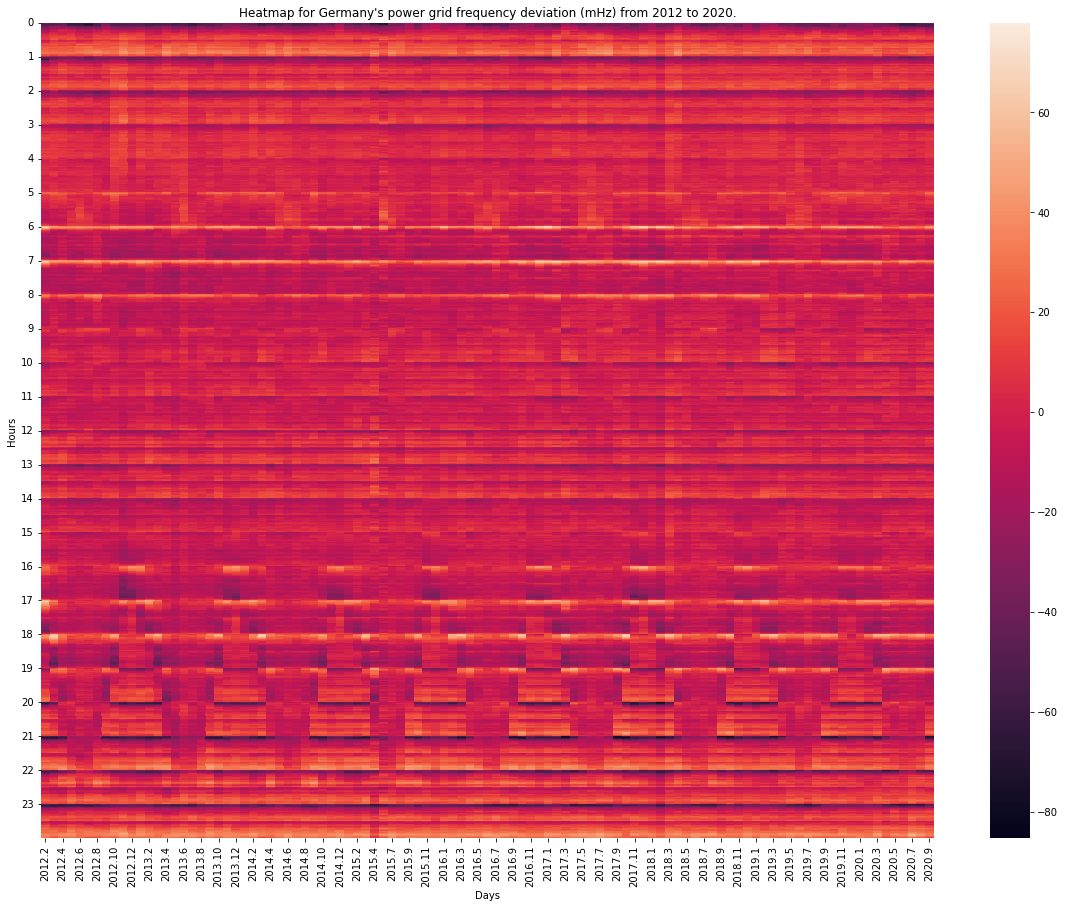

In [16]:
fig, axes = plt.subplots(figsize=(20, 15), sharex=True)
start, end = axes.get_ylim()

axes = sns.heatmap(df_pivot)
axes.set_title("Heatmap for Germany's power grid frequency deviation (mHz) from {} to {}.".format(min(years), max(years), fontsize=60))
_ = axes.set_yticks(np.arange(0, 86400, 3600))
_ = axes.set_yticklabels(range(0, 24, 1))
_ = axes.set_ylabel('Hours')
_ = axes.set_xlabel('Days')


## Time Series Plots

In [52]:
from matplotlib.transforms import Bbox

def plotLine(df_data, axe):
    df_data_mean = df_data.mean()
    df_data_max = df_data.max()
    df_data_min = df_data.min()
    bbox = dict(boxstyle="round,pad=0.3", alpha=0.3, fc="lightgrey", ec="grey", lw=1)
    text_color = 'black'
    mean_color = 'red'
    
    def annotate(**kws):
        annotate_value = (f"mean: {df_data_mean:0.4f}\n"
                          f"max: {df_data_max:0.4f}\n" 
                          f"min: {df_data_min:0.4f}")
        if abs(df_data_max) > abs(df_data_min):
            y_anotate = 0.65
        else:
            y_anotate = 0.05
        axe.annotate(annotate_value, xy=(.65, y_anotate), 
                     xycoords=axe.transAxes, color=text_color, bbox=bbox, fontsize=13)

    axe.plot(df_data)
    axe.axhline(y=df_data_mean, color=mean_color)
    axe.text(df_data[df_data.notna()].index[0], abs(df_data_mean)+20, 
             f"mean={df_data_mean:.4f}", color=text_color, weight='bold',
             bbox=bbox, fontsize=13)
    axe.tick_params(axis='x', width=2, length=7, direction='inout', rotation=30, labelsize=13)
    axe.tick_params(axis='y', width=2, length=7, direction='inout', rotation=0, labelsize=13)
    #axe.set_xlabel('Year')
    #axe.set_ylabel('Frequency Deviation (mHz)')
    annotate()
    
    
    return axe


### Time Series Plots for every year

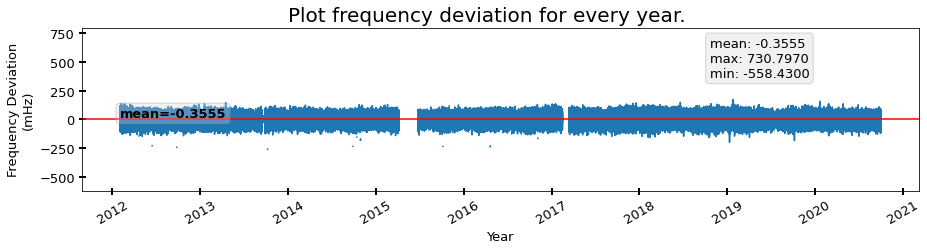

In [50]:
fig, axe = plt.subplots(figsize=(15,3))
fig.suptitle("Plot frequency deviation for every year.", size=20)

plotLine(df_freqs_all['Frequency'], axe)
axe.set_xlabel('Year', size=13)
axe.set_ylabel('Frequency Deviation\n(mHz)', size=13)
plt.show()

### Time Series Plots for each year

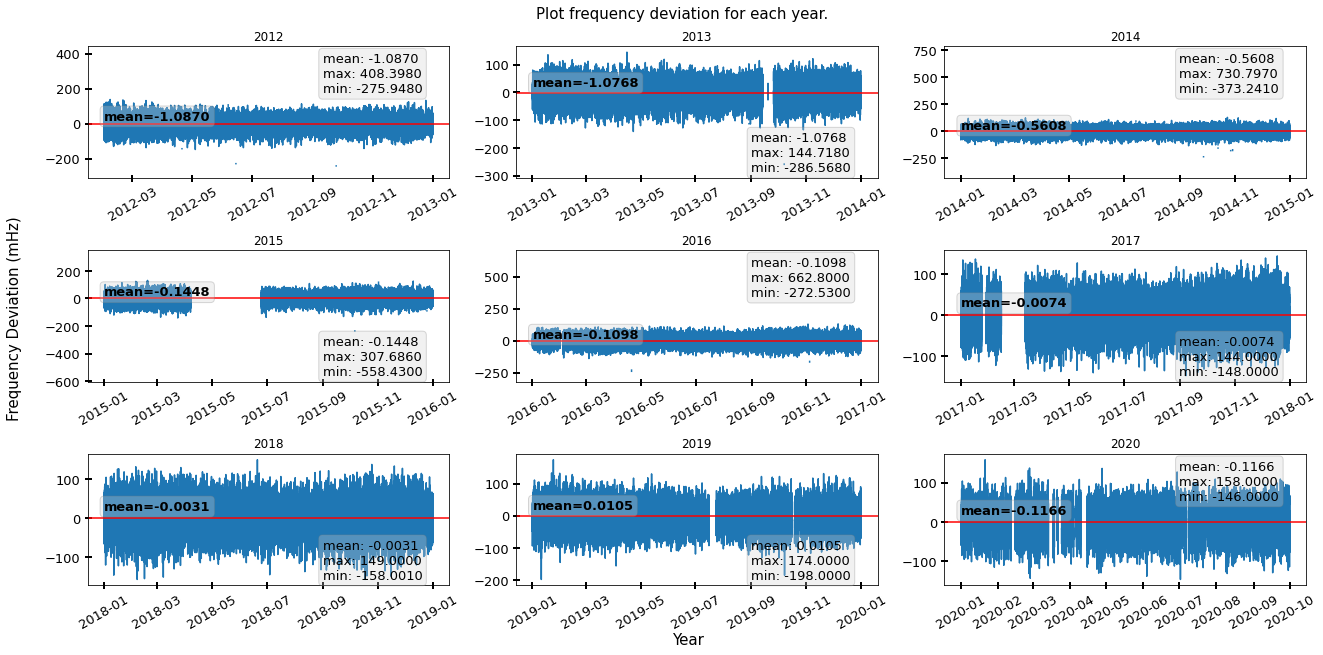

In [64]:
years = range(2012, 2021)
#years = range(2012, 2016)
row_num = 3
col_num = int(len(years)/row_num)
years_reshape = np.array(years).reshape(row_num, col_num)

fig, axe = plt.subplots(row_num, col_num, figsize=(6*col_num,3*row_num))
fig.suptitle('Plot frequency deviation for each year.', size=15)

for i, row in enumerate(years_reshape):
    for j, year in enumerate(row):
        try:
            df_temp = df_freqs[year].copy()
            plotLine(df_temp, axe[i][j])
            axe[i][j].set_title(str(int(year)))
        except Exception as e:
            #print(e)
            pass

fig.text(0.505, -0.005, 'Year', ha='center', fontsize=15)
fig.text(-0.015, 0.500, 'Frequency Deviation (mHz)', va='center', rotation='vertical', fontsize=15, 
         horizontalalignment='center')
#plt.tight_layout(h_pad=1, w_pad=1)
plt.tight_layout()
plt.show()

### The average of frequency deviation in each year.

In [65]:
df_plot = df_freqs_all.groupby('year').mean()
df_plot

,Frequency,month,day,hour,minute,second
year,,,,,,
2012,-1.086963,6.513661,15.756831,11.5,29.5,29.5
2013,-1.076794,6.526027,15.720548,11.5,29.5,29.5
2014,-0.560788,6.526027,15.720548,11.5,29.5,29.5
2015,-0.144781,6.526027,15.720548,11.5,29.5,29.5
2016,-0.109777,6.513661,15.756831,11.5,29.5,29.5
2017,-0.007402,6.526027,15.720548,11.5,29.5,29.5
2018,-0.003073,6.526027,15.720548,11.5,29.5,29.5
2019,0.010520,6.526027,15.720548,11.5,29.5,29.5
2020,-0.116590,5.007299,15.729927,11.5,29.5,29.5


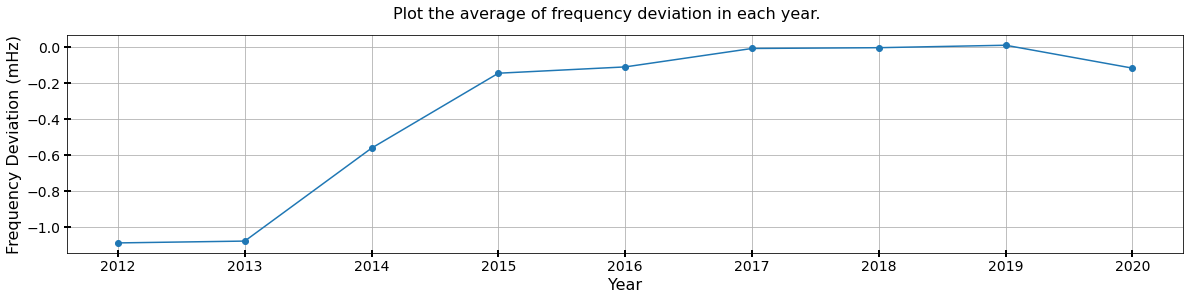

In [72]:
fig, axe = plt.subplots(figsize=(20,4))
fig.suptitle("Plot the average of frequency deviation in each year.", size=16)
axe.plot(df_plot['Frequency'], marker='o')
axe.set_ylabel('Frequency Deviation (mHz)', size=16)
axe.set_xlabel('Year', size=16)
axe.tick_params(axis='x', width=2, length=7, direction='inout', rotation=0, labelsize=14)
axe.tick_params(axis='y', width=2, length=7, direction='inout', rotation=0, labelsize=14)
axe.grid()
plt.show()